## Python statistics essential training - 03_03_histograms

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
china1965 = pd.read_csv('income-1965-china.csv')
china2015 = pd.read_csv('income-2015-china.csv')
usa1965 = pd.read_csv('income-1965-usa.csv')
usa2015 = pd.read_csv('income-2015-usa.csv')

<AxesSubplot:>

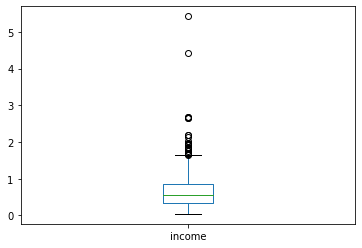

In [6]:
# a boxplot visualizes coverage intervals
china1965.income.plot(kind='box')

<AxesSubplot:>

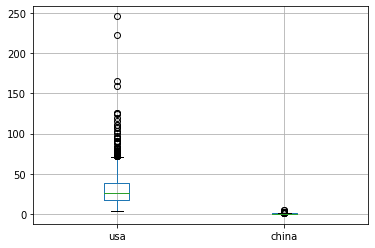

In [7]:
# create a dataframe by using a dictionary from the 2 files, and then a boxplot
# we do this to compare usa with china
pd.DataFrame({'usa':usa1965.income, 'china':china1965.income}).boxplot()


<AxesSubplot:>

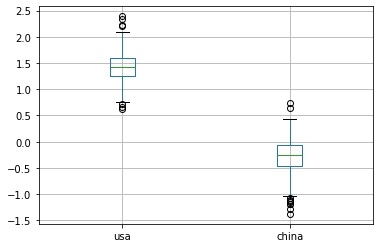

In [8]:
# we would need to take the algorithm of the income
# as the above boxplot are so different that we can not see much
pd.DataFrame({'usa':usa1965.log10_income, 'china':china1965.log10_income}).boxplot()

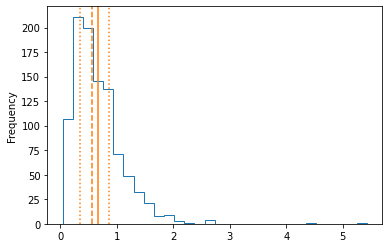

In [12]:
# ploting a histogram, and adjusting the lines for mean, median and quantiles
china1965.income.plot(kind='hist', histtype='step', bins=30)
pp.axvline(china1965.income.mean(), c='C1')
pp.axvline(china1965.income.median(), c= 'C1', linestyle='--')
pp.axvline(china1965.income.quantile(0.25), c='C1',linestyle=':')
pp.axvline(china1965.income.quantile(0.75), c='C1',linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944066)

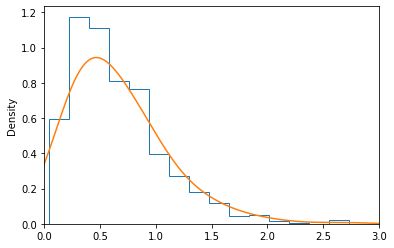

In [18]:
# we see that the mean and the median are close, as it is usually the case
# a density plot is a smooth histogram which aproximates the continous density
# of a variable.
china1965.income.plot(kind='hist', histtype='step', bins=30, density=True)
china1965.income.plot.density(bw_method=0.5)
pp.axis(xmin=0,xmax=3)

In [ ]:
# density plot is just an approximation, since we do not have access
# to the entire distribution.
# the approximation is dependable n the scale of the smoothing, which we can set
# by using bw_method

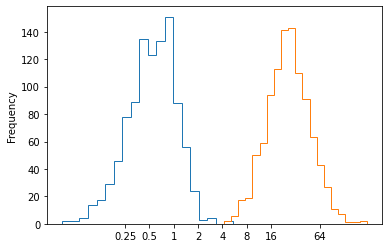

In [21]:
# compare usa and china 
china1965.log10_income.plot.hist(histtype='step', bins=20)
usa1965.log10_income.plot.hist(histtype='step', bins=20)
levels = [0.25,0.5,1,2,4,8,16,64]
# Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. 
# Whenever we plot a graph, the axes adjust and take the default ticks.
pp.xticks(np.log10(levels),levels);

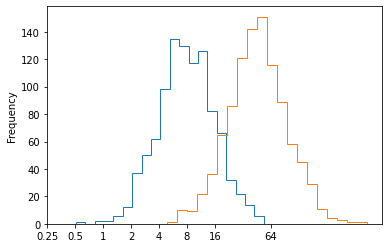

In [22]:
# compare usa and china 
china2015.log10_income.plot.hist(histtype='step', bins=20)
usa2015.log10_income.plot.hist(histtype='step', bins=20)
levels = [0.25,0.5,1,2,4,8,16,64]
# Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. 
# Whenever we plot a graph, the axes adjust and take the default ticks.
pp.xticks(np.log10(levels),levels);

In [49]:
gapminder = pd.read_csv('gapminder.csv')
china_pop2015 = float(gapminder.query('country=="China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country=="United States" and year == 2015').population)

In [50]:
china_pop2015,usa_pop2015

(1376048943.0, 321773631.0)

In [54]:
# for the wighted hist, we will create e new column weight for the dataset
# the weight will be the population devided by the # of records
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

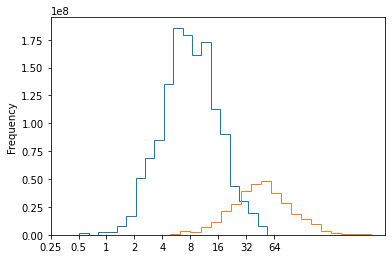

In [55]:
# compare usa and china 
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);
# Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string. 
# Whenever we plot a graph, the axes adjust and take the default ticks.


In [ ]:
# it results that there is a high purchasing power in china for people
# with high income, which overlaps with USA.
# so the companies would target that specific group.